<a href="https://colab.research.google.com/github/Lufec/Brazil_Airports_Graph_Analysis/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Redes

Luiz Fernando Carbonera Filho

# Aeroportos do Brasil

Importação das libs necessárias

In [ ]:
!pip install nxviz=='0.6.3'

In [ ]:
import networkx as nx           #Grafos
import nxviz as nv              #Desenho dos grafos
import matplotlib.pyplot as plt #Visualizacao
import pandas as pd             #Tratamento de dados 
import seaborn as sns           #Visualizacao
from itertools import compress  #Tratamento de dados
from random import choice       #Escolha aleatória de cidades

Origem dos dados:

https://github.com/alvarofpp/dataset-flights-brazil

In [ ]:
g = nx.read_graphml('/content/air_traffic.graphml')

In [ ]:
g.nodes['KDFW']['country']

'ESTADOS UNIDOS DA AMÉRICA'

Para escopo Brasil, gera-se um subgrafo onde o país é Brasil.

In [ ]:
SG=g.subgraph( [n for n,attrdict in g.nodes.items() if attrdict['country'] == 'BRASIL' ])

In [ ]:
SG.nodes(data=True)

NodeDataView({'SBUR': {'name': 'UBERABA', 'country': 'BRASIL', 'latitude': '-19.764722824097', 'longitude': '-47.966110229492'}, 'SSCL': {'name': 'CASSILÂNDIA', 'country': 'BRASIL', 'latitude': '-19.146861', 'longitude': '-51.676941'}, 'SWKC': {'name': 'CÁCERES', 'country': 'BRASIL', 'latitude': '-16.04360008239746', 'longitude': '-57.62990188598633'}, 'SNDB': {'name': 'RURÓPOLIS', 'country': 'BRASIL', 'latitude': '-4.0855560302734375', 'longitude': '-54.910831451416016'}, 'SWBI': {'name': 'BARREIRINHA', 'country': 'BRASIL', 'latitude': '-2.79241991043', 'longitude': '-57.0578994751'}, 'SJKB': {'name': 'COTRIGUAÇU', 'country': 'BRASIL', 'latitude': '-13.087501', 'longitude': '-58.025833'}, 'SBHT': {'name': 'ALTAMIRA', 'country': 'BRASIL', 'latitude': '-3.2539100646973', 'longitude': '-52.254001617432'}, 'SWRD': {'name': 'RONDONÓPOLIS', 'country': 'BRASIL', 'latitude': '-16.586', 'longitude': '-54.7248'}, 'SNRJ': {'name': 'BREJO', 'country': 'BRASIL', 'latitude': '-3.6669440269470215', 

A relação dos aeroportos com as regiões é oriunda da tabela "airports.csv"

In [ ]:
airports = pd.read_csv('/content/airports.csv').drop(columns = ['name','state','country','continent','Código OACI','lat_geo_point','lon_geo_point'])

Retira NaN's da coluna "regions"

In [ ]:
airports = airports.loc[~(airports['region'].isna())]

In [ ]:
airports

,code,region
3,SBCF,SUDESTE
4,SBGL,SUDESTE
5,SBGR,SUDESTE
6,SBRF,NORDESTE
7,SBSV,NORDESTE
...,...,...
1052,SSAE,SUL
1062,SWJQ,CENTRO-OESTE
1065,SNLO,SUDESTE
1066,SBER,NORTE


Para acrescentar a região em cada nó, é preciso gerar dicionário entre Código e Região

In [ ]:
dict_mun_reg = {}

for i in SG.nodes():
  mun = i
  cond = airports['code'] == mun
  reg = airports['region'][cond].item()
  dict_mun_reg[mun] = reg

Set do atributo "region"

In [ ]:
nx.set_node_attributes(SG,dict_mun_reg,'region')

Visualização usando latitude e longitude presente nos nodes:

Primeiro, converter atributo de "String" para "Float"

In [ ]:
for (p,d) in SG.nodes(data=True):
  mun = p
  d['latitude'] = float(d['latitude'])
  d['longitude'] = float(d['longitude'])
  

[]

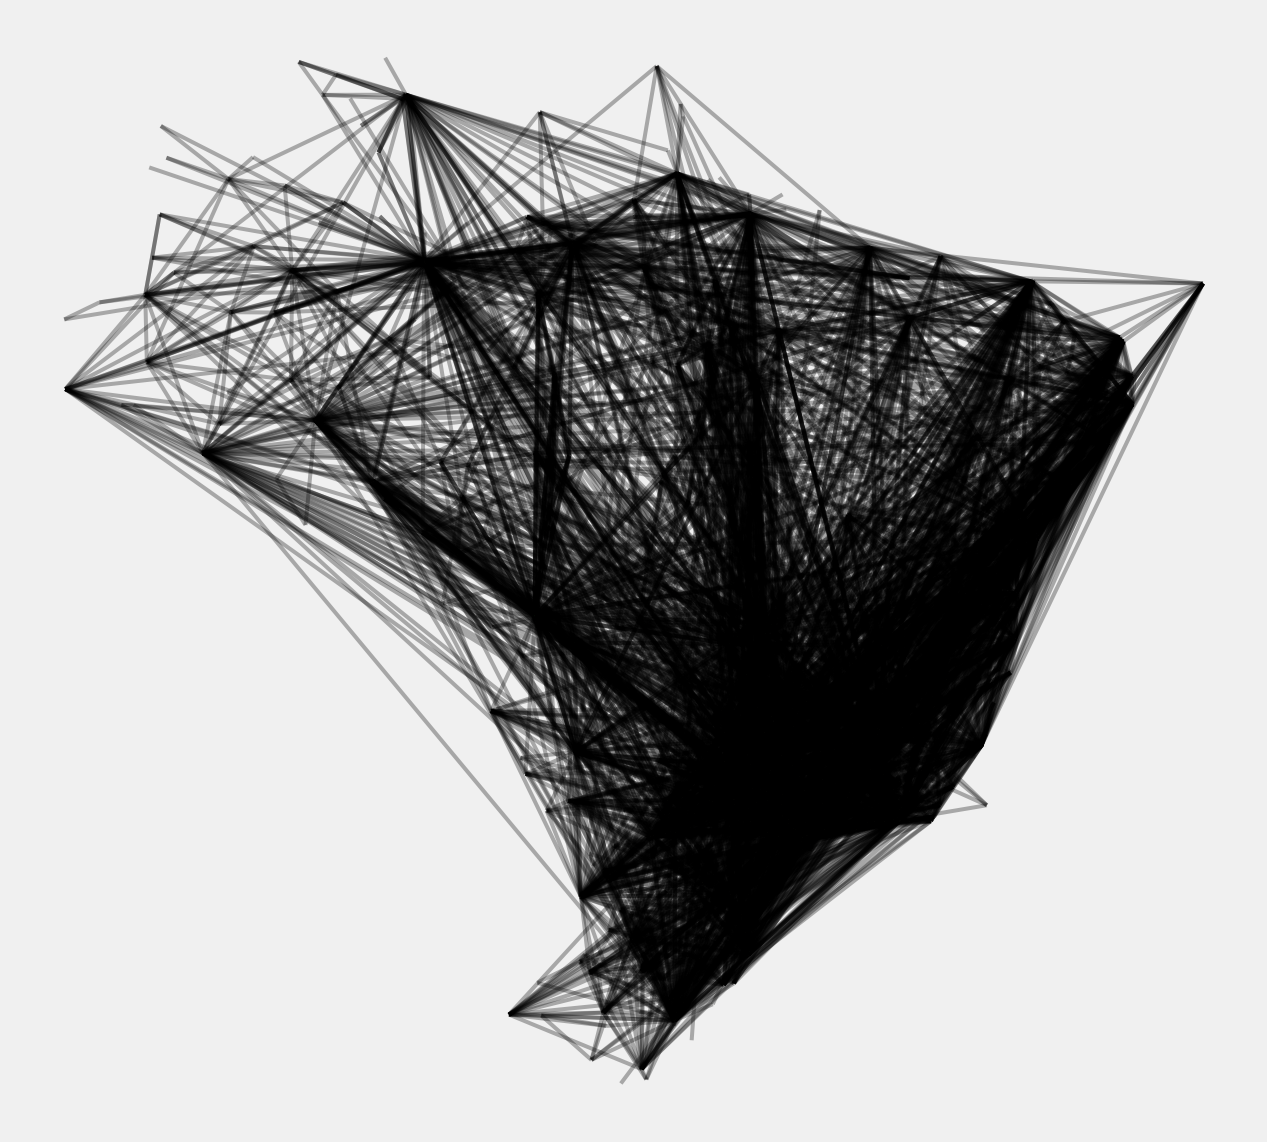

In [ ]:
from nxviz import GeoPlot

g = GeoPlot(
    SG,
    node_lat = 'latitude',
    node_lon = 'longitude',
    node_size = 2000,
    edge_width = 1,
    node_color = 'region',
    figsize = (20,20)
)

g.draw()
plt.plot()

Nota-se que existem Nós com maior quantidade de vizinhos. Isso indica aeroportos de maior porte. Geralmente em capitais ou cidades pólos.

Já os nós com poucas conexões indica aeroportos menores.

In [ ]:
SG.nodes(data=True)['SNJK']

{'country': 'BRASIL',
 'latitude': '-13.877699851989746',
 'longitude': '-40.07160186767578',
 'name': 'JEQUIÉ',
 'region': 'NORDESTE'}

## 1) Assortatividade

### Grau

In [ ]:
nx.attribute_assortativity_coefficient(SG,"region")

0.3708080659810461

Valor positivo indica que os nós tendem a se associar a outros nós semelhantes.

Valor não é tão elevado pois grandes pólos possuem conexões com pólos menores para conectar toda a malha aeréa. Além disso, alguns desses pólos menores da aviação necessitam possuir conexão com um grande nó para realizar viagens mais distantes.

### Circus Plot

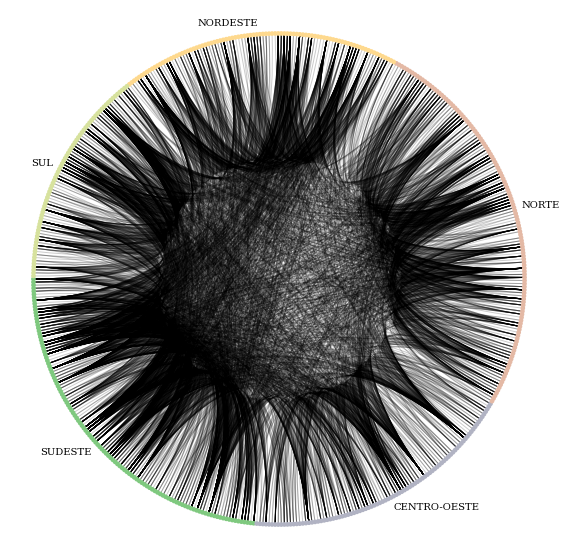

In [ ]:
# Create a Circos Plot
c = nv.CircosPlot(SG,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="default",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,10))

# Draw c to the screen
c.draw()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

Tendências observadas:

1) Regiões tendem a possuir mais conexões entre si. Possível causa é a alimentação local de passageiros, onde os aeroportos locais de grande porte tendem a se conectar com mais aeroportos menores da mesma região;

2) Observa-se um elevado número de conexões entre aeroportos do Sudeste entre si, além de Sudeste-Sul e Sudeste-Nordeste. Portanto, nota-se que a região Sudeste possui a maior concentração de aeroportos de grande porte dentre as demais regiões;

3) Nota-se que as conexões entre a região Sul e Norte são as mais fracas dentre as demais relações. Isso é explicado devido a distância entre as regiões;

## 2 Análise Bivariada

Etapa necessária para essa e análises futuras:

Separar em listas os nós de cada região. Nesse caso, apenas o nome é necessário.

In [ ]:
nodes_nt_l = []
nodes_nd_l = []
nodes_co_l = []
nodes_sd_l = []
nodes_sl_l = []
nodes_br_l = []
for (p,d) in SG.nodes(data = True):
    if d['region'] == 'NORTE':
      nodes_nt_l.append(p)
    elif d['region'] == 'NORDESTE':
      nodes_nd_l.append(p)
    elif d['region'] == 'CENTRO-OESTE':
      nodes_co_l.append(p)
    elif d['region'] == 'SUDESTE':
      nodes_sd_l.append(p)
    elif d['region'] == 'SUL':
      nodes_sl_l.append(p)
    nodes_br_l.append(p)

In [ ]:
SG.nodes(data=True)[nodes_sl_l[1]]['region']

'SUL'

Função de plot e save das imagens

In [ ]:
def plot_bivariate(SG,nodes,name):
    # average degree of neighbors
    degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(SG, nodes = nodes).items())
    # convert to list
    degree = list(degree)
    avg_neigh_degree = list(avg_neigh_degree)
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    sns.regplot(degree,avg_neigh_degree,ax=ax)

    ax.set_xlabel("Node Degree")
    ax.set_ylabel("Average neighbor degree")
    ax.set_xlim(0,65)
    # Save figure
    plt.savefig("degree_assortativity_"+name+".png", 
                format="png",
                dpi=400, 
                bbox_inches="tight",
                transparent=True)

    plt.show()

### Brasil

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


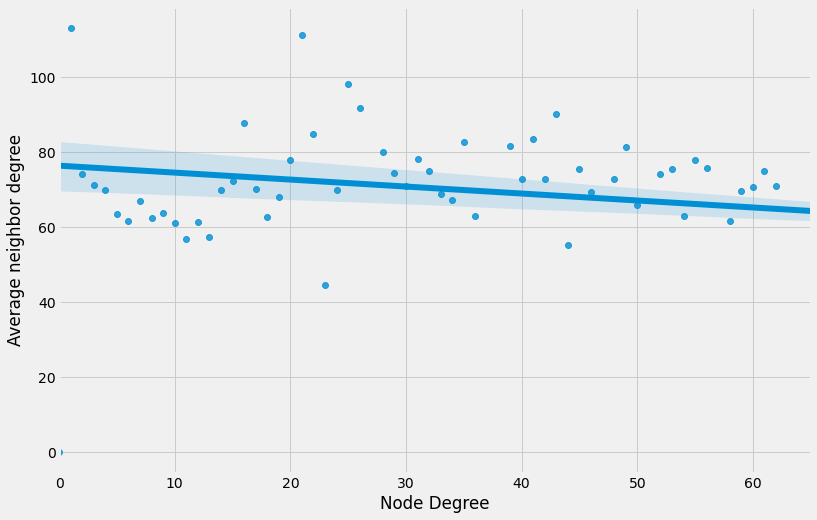

In [ ]:
plot_bivariate(SG, nodes_br_l,'BR')

Padrão observado para o Brasil é uma leve reta decrescente.

Motivo: nós de menor grau possuem alta chance de ter vizinhos com altíssimos graus (aeroportos menores com conexão aos aeroportos principais). Já os aeroportos principais aparentam possuir diversas conexões à vizinhos de baixo grau (aeroportos menores). 

Mesmo sendo uma relação decrescente, ela não aparenta ser forte pois há um offset entre os aeroportos de mesmo grau: aeroportos grandes tendem a também se conectar entre si, e o mesmo ocorre entre os aeroportos menores. No final, a relação de "aeroportos menores" não supera o alto grau dos aeroportos maiores conectados à eles. 

### Região Norte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


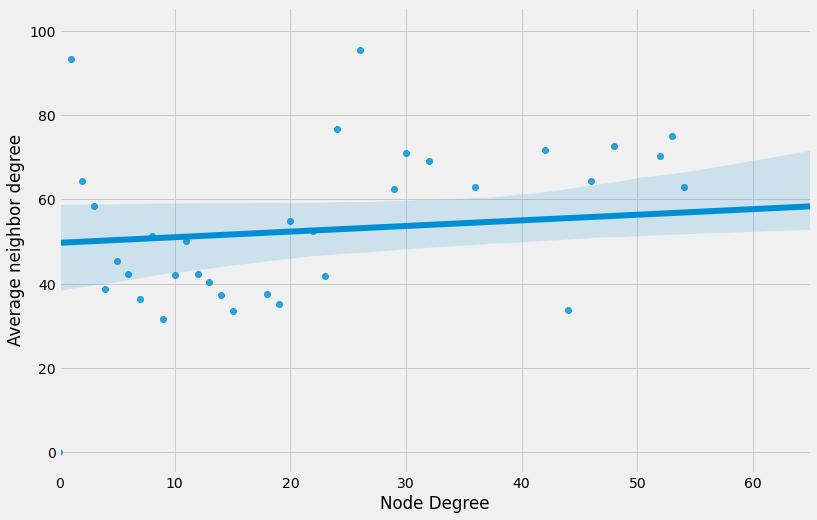

In [ ]:
plot_bivariate(SG,nodes_nt_l,'NORTE')

Região Norte: observa-se que o grau médio dentre os vizinhos é menor que o padrão brasileiro. Uma possível teoria é a reduzida quantidade de aeroportos de grande porte na região e no funcionamento da malha aérea amazônica, onde aparentemente predominam aeroportos de menor grau.

### Nordeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


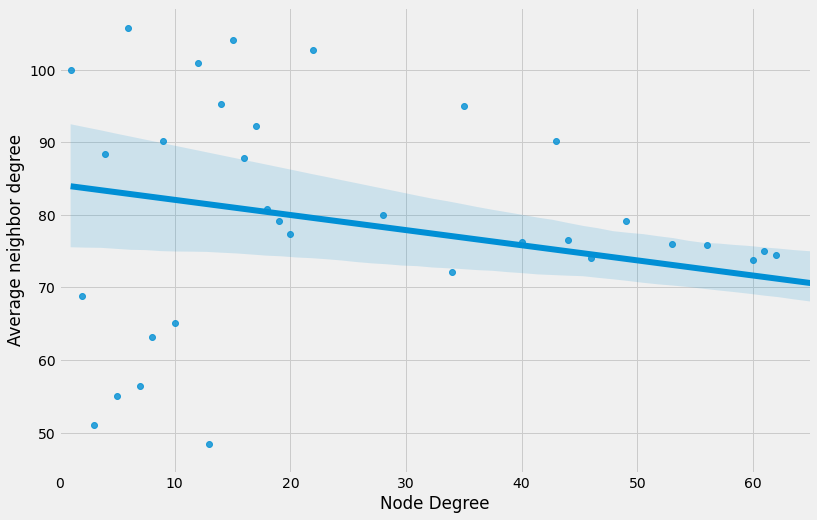

In [ ]:
plot_bivariate(SG,nodes_nd_l,'NORDESTE')

Um padrão diferente é observado no Nordeste.

A relação de aeroportos principais que possuem conexões com aeroportos regionais é mais intensa, uma vez que o grau médio dos aeroportos menores é maior que os valores médios brasileiros. Isso indica que pode não ter tantas conexões de aeroportos menores entre si, ou uma maior quantidade de conexões desses tipos com os de maior porte.

### Centro-Oeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


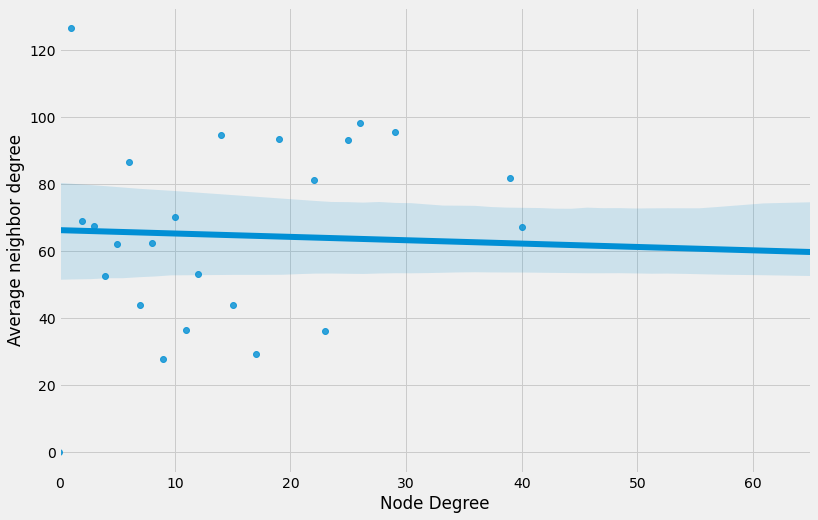

In [ ]:
plot_bivariate(SG,nodes_co_l,'CENTRO_OESTE')

Padrão interessante observado no Centro-Oeste é que não possuem aeroportos com graus acima de 40, entretanto o grau médio de seus vizinhos é acima desse valor. Isso indica o peso que aeroportos de grande porte de outras regiões fazem no Centro-Oeste.

### Sudeste

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


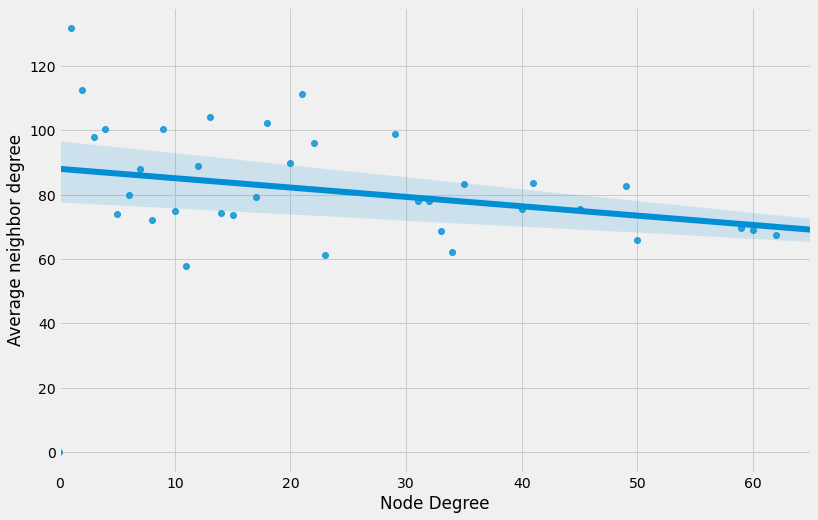

In [ ]:
plot_bivariate(SG,nodes_sd_l,'SUDESTE')

Região Sudeste possui um comportamento ao da região Nordeste: muitos aeroportos pequenos e médios conectam-se aos principais aeroportos da região, porém com a sutil diferença de que os aeroportos de menor grau possuem um Average Neighbor Degree mais elevado, decorrente do tamanho dos aeroportos da respectiva região

### Sul

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


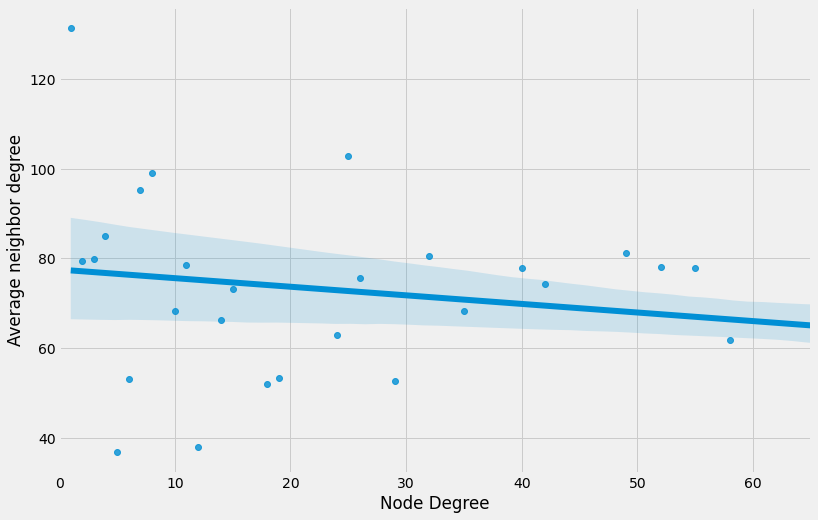

In [ ]:
plot_bivariate(SG,nodes_sl_l,'SUL')

Tal qual sudeste, a região sul possui um comportamento semelhante, com a pequena diferença que alguns aeroportos de menor porte possuem menores AND.

## 3) Componentes conectados

In [ ]:
nx.number_connected_components(SG)

5

Observando componentes conectados:

In [ ]:
for component in nx.connected_components(SG):
  print(component)

{'SBUR', 'SSCL', 'SWKC', 'SNDB', 'SJKB', 'SWBI', 'SBHT', 'SWRD', 'SNRJ', 'SNVR', 'SBMS', 'SWCD', 'SNBA', 'SWUY', 'SNEB', 'SSZW', 'SBVC', 'SDMC', 'SNBS', 'SIFV', 'SDWQ', 'SBTL', 'SNSH', 'SBCD', 'SDZC', 'SNAP', 'SNMH', 'SBAM', 'SBSG', 'SBSJ', 'SNVV', 'SNSW', 'SIBU', 'SDLU', 'SWRF', 'SBMH', 'SWFX', 'SDCG', 'SSOG', 'SBMO', 'SWPY', 'SSTL', 'SBAF', 'SSCK', 'SNAV', 'SBML', 'SBRB', 'SWPD', 'SBDN', 'SBSI', 'SIXE', 'SJTC', 'SNBU', 'SBPP', 'SBAN', 'SWNQ', 'SBPB', 'SSVI', 'SWEI', 'SNBR', 'SSPI', 'SSTD', 'SNMU', 'SBBV', 'SBGM', 'SBCB', 'SWLB', 'SBFZ', 'SWVR', 'SWBC', 'SBTS', 'SBIT', 'SDZG', 'SJQP', 'SNJD', '6ASO', 'SNDT', 'SBCG', 'SNQX', 'SBBT', 'SDRS', 'SBBZ', 'SBIL', 'SDAM', 'SWKK', 'SWEK', 'SBAE', 'SNGA', 'SBJE', 'SSER', 'SNMD', 'SBRP', 'SNOB', 'SNCI', 'SBPA', 'SNOX', 'SWFE', 'SBIP', 'SWZM', 'SBPC', 'SDVG', 'SBBH', 'SNDQ', 'SBDB', 'SNLO', 'SBCT', 'SJTS', 'SBSL', 'SWYK', 'SJQK', 'SWPC', 'SBPG', 'SNRS', 'SBRG', 'SNNT', 'SNML', 'SWJV', 'SNBX', 'SBBW', 'SBZM', 'SNFO', 'SSLS', 'SSFB', 'SBGR', 'SBTC',

In [ ]:
unconnected = ['SNGR','SNBG','SSBE','SBER']
for i in unconnected:
  print(SG.nodes(data=True)[i])

{'name': 'CUMARU DO NORTE', 'country': 'BRASIL', 'latitude': -7.783610820770264, 'longitude': -51.133888244628906, 'region': 'NORTE'}
{'name': 'BAIXO GUANDU', 'country': 'BRASIL', 'latitude': -19.499000549316406, 'longitude': -41.04180145263672, 'region': 'SUDESTE'}
{'name': 'CAMAPUÃ', 'country': 'BRASIL', 'latitude': -19.598400115966797, 'longitude': -54.02109909057617, 'region': 'CENTRO-OESTE'}
{'name': 'EIRUNEPÉ', 'country': 'BRASIL', 'latitude': -6.663039999999967, 'longitude': -69.86730999999997, 'region': 'NORTE'}


Observa-se que a região Norte possui a maior quantidade de aeroportos "desconectados" da malha aérea, enquanto que as regiões Sudeste e Centro-Oeste possuem apenas 1 cada.

Motivo pode ser que esses aeroportos são específicos para certas tarefas ou são de treino, portanto não existe transporte de passageiros contínuo entre eles.

### 4) Cenário simulado de Trajetos

Metodologia: seleção aleatória de cidades dentro da lista das regiões.

In [ ]:
city_nt = choice(nodes_nt_l)
print(SG.nodes(data=True)[city_nt])

{'name': 'PARINTINS', 'country': 'BRASIL', 'latitude': -2.6730198860168457, 'longitude': -56.777198791503906, 'region': 'NORTE'}


In [ ]:
city_sl = choice(nodes_sl_l)
print(SG.nodes(data=True)[city_sl])

{'name': 'NOVO HAMBURGO', 'country': 'BRASIL', 'latitude': -29.69610023498535, 'longitude': -51.08169937133789, 'region': 'SUL'}


In [ ]:
city_nd = choice(nodes_nd_l)
print(SG.nodes(data=True)[city_nd])

{'name': 'ARACATI', 'country': 'BRASIL', 'latitude': -4.568611, 'longitude': -37.804722, 'region': 'NORDESTE'}


In [ ]:
city_co = choice(nodes_co_l)
print(SG.nodes(data=True)[city_co])

{'name': 'COLÍDER', 'country': 'BRASIL', 'latitude': -10.760403, 'longitude': -55.462283, 'region': 'CENTRO-OESTE'}


In [ ]:
city_sd = choice(nodes_sd_l)
print(SG.nodes(data=True)[city_sd])

{'name': 'GAVIÃO PEIXOTO', 'country': 'BRASIL', 'latitude': -22.909286, 'longitude': -43.181956, 'region': 'SUDESTE'}


Usando "shortest path", encontra-se os trajetos com menor número de conexões entre os aeroportos seleiconados.

In [ ]:
print('Trajeto 1')
for i in nx.shortest_path(SG,city_nt,city_sl):
  print(SG.nodes(data=True)[i]) 

print('\nTrajeto 2')
for i in nx.shortest_path(SG,city_sl,city_nd):
  print(SG.nodes(data=True)[i]) 

print('\nTrajeto 3')
for i in nx.shortest_path(SG,city_nd,city_co):
  print(SG.nodes(data=True)[i]) 

print('\nTrajeto 4')
for i in nx.shortest_path(SG,city_co,city_sd):
  print(SG.nodes(data=True)[i]) 

Trajeto 1
{'name': 'PARINTINS', 'country': 'BRASIL', 'latitude': -2.6730198860168457, 'longitude': -56.777198791503906, 'region': 'NORTE'}
{'name': 'CONFINS', 'country': 'BRASIL', 'latitude': -19.62444305419922, 'longitude': -43.97194290161133, 'region': 'SUDESTE'}
{'name': 'PORTO ALEGRE', 'country': 'BRASIL', 'latitude': -29.994400024414062, 'longitude': -51.1713981628418, 'region': 'SUL'}
{'name': 'NOVO HAMBURGO', 'country': 'BRASIL', 'latitude': -29.69610023498535, 'longitude': -51.08169937133789, 'region': 'SUL'}

Trajeto 2
{'name': 'NOVO HAMBURGO', 'country': 'BRASIL', 'latitude': -29.69610023498535, 'longitude': -51.08169937133789, 'region': 'SUL'}
{'name': 'PORTO ALEGRE', 'country': 'BRASIL', 'latitude': -29.994400024414062, 'longitude': -51.1713981628418, 'region': 'SUL'}
{'name': 'RECIFE', 'country': 'BRASIL', 'latitude': -8.126489639282227, 'longitude': -34.92359924316406, 'region': 'NORDESTE'}
{'name': 'ARACATI', 'country': 'BRASIL', 'latitude': -4.568611, 'longitude': -37.8

A partir de repetidas execuções, padrões foram observados:

1)Quase não há conexões diretas entre a região Norte e Sul. O ponto intermediário em comum desse primeiro trajeto é a região Sudeste;

2)Para os demais, o padrão observado para viajar entre cidades pequenas é realizar a conexão para um aeroporto principal da região origem, conectar a outro aeroporto principal da região destino e este conectar à cidade destino.

3)Exceções podem ocorrer caso a cidade possa pular uma dessas etapas.

4) Dentre as 10 repetições executadas, o número comum de conexões observadas entre uma cidade A e B é de 1 a 2 intermediário.

## 5) Cluster

### Brasil

In [ ]:
nx.average_clustering(SG)

0.6278309782838654

Para o Brasil, o coeficiente de clustering é de 0.627. Isso indica que existe um certo grau de conectividade entre os aeroportos. Uma teoria é de que essa clusterização é alta dentre os aeroportos de alto e médio porte, e os aeroportos de pequeno porte reduzem esse índice. Caso esses aeroportos menores possuam conexões entre si, esse índice pode ser maior de região para região


### Discriminado por regiões

In [ ]:
regions_list = [nodes_br_l, nodes_nt_l, nodes_nd_l, nodes_co_l, nodes_sd_l, nodes_sl_l]
for i in regions_list:
  print(nx.average_clustering(SG, nodes = i))

0.6278309782838654
0.6193234213643342
0.5584718155693124
0.6530980955194701
0.6237173817999269
0.7063880195630848


Seguindo a ordem, o coeficiente de clusterização observado para cada região foi:

Norte: 0.619

Nordeste: 0.558

Centro-Oeste: 0.653

Sudeste: 0.623

Sul: 0.706


Primeiro ponto: Norte e Sudeste seguem a média Brasileira.

Segundo ponto: Nordeste possui um coeficiente muito abaixo da média brasileira, condizente com a análise bivariada calculada na tarefa 2). Novamente, uma explicação é que os aeroportos pequenos possuem apenas conexões diretas com aeroportos de grande porte, ou possuem muito poucas conexões entre si.

Terceiro ponto: A região Centro-Oeste e Sul apresentam valores acima da média brasileira. Para o Centro-Oeste, isso pode ser devido ao reduzido número de aeroportos de grande porte, deixando apenas os aeroportos de médio porte comunicando-se entre si. O mesmo pode ser teorizado para a região Sul, só que em escala maior ainda.